In [10]:
!pip install pandas psycopg2-binary sqlalchemy matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 68.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 52.3 MB/s eta 0:00:00


In [11]:
import pandas as pd
import psycopg2 as db
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

In [3]:
db_type = 'postgresql'
host = 'database'
port = 5432
db_name = os.environ.get('POSTGRES_DB')
user = os.environ.get('POSTGRES_USER')
password = os.environ.get('POSTGRES_PASSWORD')

conn_uri = f"{db_type}://{user}:{password}@{host}:{port}/{db_name}"
alchemyEngine = create_engine(conn_uri)
db_conn = alchemyEngine.connect();

In [5]:
query = "SELECT * FROM item WHERE category_code IS NOT NULL LIMIT 5"
df = pd.read_sql(query, db_conn)
df.head()

,product_id,category_id,category_code,brand
0,5732026,1487580011970953472,furniture.bathroom.bath,domix
1,5746846,2193074740686488320,furniture.bathroom.bath,irisk
2,5884577,1487580006350586880,appliances.environment.vacuum,max
3,5855507,1487580006350586880,appliances.environment.vacuum,max
4,5884578,1487580006350586880,appliances.environment.vacuum,max


In [20]:
tb = 'customers'
query = f"""
SELECT event_type as Type, COUNT(*) as Count
FROM {tb}
GROUP BY event_type
"""
df = pd.read_sql(query, db_conn)
df.head()

,type,count
0,cart,5768333
1,purchase,1287007
2,remove_from_cart,3979679
3,view,9657821


<function matplotlib.pyplot.show(close=None, block=None)>

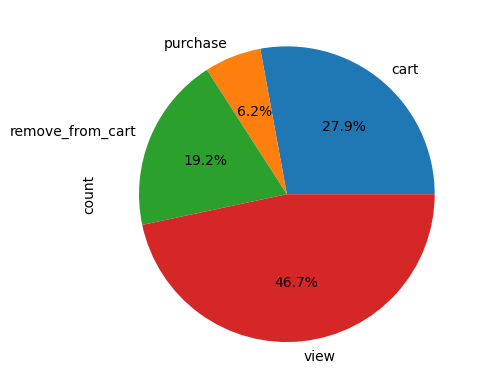

In [21]:
df.set_index('type').plot.pie(y='count', autopct='%1.1f%%', legend=False)
plt.show